# Heap Sort Notebook

<br>

***

## Explanation of the Heap Sort Algoritm

***

- Heapsort is a very popular and efficient sorting algorithm in most cases.
- Heapsort uses a comparison based sorting technique based on the binary heap data structure, this structure is a tree data structure that has at max two child nodes.
- The two main forms of sorting used are Max Heap and Min Heap.
- Min Heap works by comparing each node in the tree to see if it is higher or lower, if it is lower the elements in the nodes are swapped and the higher element is moved down the tree until the list is fully sorted.
- Max Heap does the opposite of min and wants to order the list descending with the biggest elements at the top of the sorted list.
- Both of these sorting techniques can be seen in the image below.
- The heap before sorting = [50, 20, 40, 10, 70, 30, 60]
<br><br>
<img src="https://miro.medium.com/max/1316/1*02r6G-ho8DPnfiaOIHA2OA.png" alt="Heap Sort Example" width="600" align="left"/>

- Explaination Reference - https://www.geeksforgeeks.org/heap-sort/
- Image Reference - https://levelup.gitconnected.com/visualizing-designing-and-analyzing-the-heap-sort-algorithm-482c917c733b

***

## Python Function Implementing Heap Sort

***

### Function Implementing basic Heap Sort

Code reference - https://www.youtube.com/watch?v=laYrbOAmuvQ&ab_channel=CodeSavant

In [1]:
def swap(list, i, j):
    # swap the elements i and j with each other
    list[i], list[j] = list[j], list[i]

In [2]:
def siftDown(list, i, upper):
    # Moves the top element down so the new top element is the largest
    while(True):
        # get the indices of the left and right children
        left, right = i*2+1, i*2+2
        # check if there are two children
        if max(left, right) < upper:
            # two indices are valid - break
            if list[i] >= max(list[left], list[right]): break
            # check if left is greater than right
            elif list[left] > list[right]:
                # swap parent node with left child
                swap(list, i, left)
                # update pointer for parent node
                i = left
            # else swap with the right child
            else:
                swap(list, i, right)
                # update pointer for parent node
                i = right
        # check if only the left child exists
        elif left < upper:
            # check if this child is greater than the parent
            if list[left] > list[i]:
                # swap parent and child
                swap(list, i, left)
                # update pointer for parent node
                i = left
            else: break # if condition fails break
        # check if only the right child exists
        elif right < upper:
            # check if this child is greater than the parent
            if list[right] > list[i]:
                # swap parent and child
                swap(list, i, right)
                # update pointer for parent node
                i = right
            else: break # if condition fails break
        # check if there are no children and break
        else: break

In [3]:
def heapSort(list):
    # heapify into a max heap
    for j in range((len(list)-2)//2, -1, -1):
        # sift down the list
        siftDown(list, j, len(list))
    # implement sorting 
    for end in range(len(list)-1, 0, -1):
        # swap at index 0 and end
        swap(list, 0, end)
        # siftdown new element after swap
        siftDown(list, 0, end)

In [4]:
# Create a list to sort 
numList = [23, 4, 16, 10, 32, 5, 12, 9, 27, 36]
numList

[23, 4, 16, 10, 32, 5, 12, 9, 27, 36]

In [5]:
# Call the heapsort method and pass in the list to be sorted
heapSort(numList)
numList

[4, 5, 9, 10, 12, 16, 23, 27, 32, 36]

### Alternative Function Using Heap Queue Library

Code Reference - https://docs.python.org/3/library/heapq.html

In [6]:
""" Link to documentation - https://docs.python.org/3/library/heapq.html
    Using the Heap Queue library we can reduce the amount of code by a large margin.
    This is a very basic function that implements heap sorting by pushing all values onto a heap 
    and then popping off the smallest values one at a time. 
"""

# import heappush and heappop from heapq library
from heapq import heappush, heappop

def heap_sort(list):
    # create an empty array to store heap
    heap = []
    # for every value in the list 
    for value in list:
        # call the heappush function and pass in the heap array and the values
        heappush(heap, value)
    # return the heap array and call heappop to pop the smallest values off the the top of the list 
    return [heappop(heap) for i in range(len(heap))]

In [7]:
# call the new heap_sort method and pass in an array of numbers 
heap_sort([23, 4, 16, 10, 32, 5, 12, 9, 27, 36])

[4, 5, 9, 10, 12, 16, 23, 27, 32, 36]

***

## Explaination of the Computational Complexity of Heap Sort

***

- To explain the computational complexity of heap sort I'm going to break it up into the different aspects of it.
- These include:
    1. Complexity of inserting a new node
    2. Complexity of removing the maximum value node
    3. Complexity of creating a heap
    4. The total time complexity
    5. The worst case time complexity
    6. The best case time complexity
    7. The average time complexity
    8. The space complexity

### 1. Complexity of Inserting a New Node

- When inserting a new value into a heap the maximum number of steps needed to be taken is O(log(n)), which is always the maximum height of binary trees.
- On inserting a value it will be swapped with a value greater than it, and the number of swaps would be O(log(n)).

### 2. Complexity of Removing the Maximum Value Node

- When removing the maximum value node from a heap to the end of the list the maximum steps required to complete is also O(log(n)).
- It is the exact same thing as inserting a node only the node is going in the other direction as we swap the maximum value with a value lower than it until it has reached the bottom level of the tree.

### 3. Complexity of Creating a Heap

- In the heapSort method above when creating the heap itself the time complexity is O(n).
- This is because not all nodes will move on creation of the heap only the root nodes and the middle nodes move while the nodes at the bottom level of the tree don't move at all.
- All the levels in between the top and bottom levels will move down differently depending on how high the level is.
- The second last level moves once, the third last twice and so on.
- The calculation to calculate the complexity returns the complexity O(n) everytime and it is as follows:
    - (n/2 * 0) + (n/4 * 1) + (n/8 * 2) + (n/16 * 3) + ...h        
    - n/2 refers to the bottom level of the tree and the value of n/? doubles with each level you rise from the bottom.
    - the h at the end is the height of the max-heap structure.

### 4. The Total Time Complexity

- The total time complexity for the heap sort is O(n(log(n))).
- This is because:
    - The first removal of a node takes log(n) time.
    - The second takes log(n-1) time.
    - The third take log(n-2) time.
    - This continues until the last node where the time take is log(1).
- We can use this calculation to see the complexity working out:
    - log(n) + log(n-1) + log(n-2) + ....log(1)
    - as log(x) + log(y) = log(x * y), we get
    - =log(n∗(n−1)∗(n−2)∗…∗2∗1)
    - =log(n!)
    - Upon further simplification (using Stirling's approximation), log(n!) turns out to be
    - =n∗log(n)−n+O(log(n))
- This calculation leaves us with O(n(log(n))) which is the total runtime of the algorithm.

### 5. The Worst Case Time Complexity

- The worst case possible for a heap sort to encounter is when all the elements in a list are different.
- This means heapifying has to be done everytime an element is removed.
- The number of swaps required to remove every element is log(n).
- This has to be done for every node which gives us the calculation of n * (log(n)).
- This means the worst possible runtime for heap sort is O(n(log(n))).

### 6. The Best Case Time Complexity

- The best case possible for a heap sortis when all the elements in a list are identical.
- This means removing each node only takes a constant time of O(1).
- No nodes have to be moved up or down in this situation.
- The calculation that gives us the best runtime is n * O(1).
- This leaves us with a runtime of O(n).

### 7. The Average Time Complexity

- To calculate the average time you need to look at all possible inputs and any distinct elements.
- The heapify function would have to perform like this:
    - log(n)/2 - first iteration of heapify
    - log(n-1)/2 - second iteration of heapify
    - log(n-2)/2 - third iteration of heapify
    - etc. 
- The calculation looks like this:
    - (log(n))/2 + (log(n-1))/2 + (log(n-2))/2 + (log(n-3))/2 + ...
    - Final result would be:
    - =1/2(log(n!))
    - =1/2(n∗log(n)−n+O(log(n)))
- To calculate for all nodes (n * O(n(log(n)))).
- To finally get the average runtime divide by n which leave O(n(log(n))).

### 8. The Space Complexity

- With heapsort being an in-place sorting algorithm the space requirement is constant.
- This is due to the fact that when anything is inputted the list of items is arranged in place in a heap structure.
- The removed item is also placed at the end of the list after taking the max node from the heap.
- This means there is no extra space used when implementing the algorithm so the space complexity is O(1).

- Reference for all explanations - https://iq.opengenus.org/time-complexity-of-heap-sort/

***

## Explanation of how Graph Theory is used in Heap Sort

***

- Heaps are basically graphs that have a few different properties:
    - Each node has at most two children nodes.
    - The root node has either the smallest or the highest value in the graph.
    - Each subtree is a heap with the same properties as the overall heap.

- Below I have drawn two trees to show the theory behind heap sort.
    - The first tree is made from the original list of integers that I used in the heap sorting algorithm.
    - The second tree is using the numList list which has been sorted above using the heapsort function.

- Reference - https://trykv.medium.com/algorithms-on-graphs-the-importance-of-heaps-e3e1385ae534

### Draw Trees Before and After Heap Sort

Reference from videos on module

In [8]:
# Plots.
import matplotlib.pyplot as plt

In [9]:
# Change default plot size.
plt.rcParams["figure.figsize"] = (10, 5)

In [10]:
# Import networkx for Graphs
import networkx as nx

In [11]:
# Math functions.
import math

In [12]:
# original list of integers to be sorted from above function
L = [23, 4, 16, 10, 32, 5, 12, 9, 27, 36]

In [13]:
def drawtree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

[23, 4, 16, 10, 32, 5, 12, 9, 27, 36]


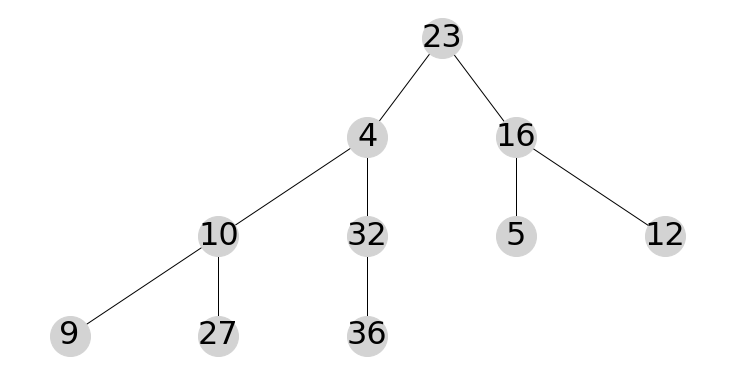

In [14]:
# Show the list
print(L)
# Draws the original list of integers in the tree 
drawtree(L)

[4, 5, 9, 10, 12, 16, 23, 27, 32, 36]


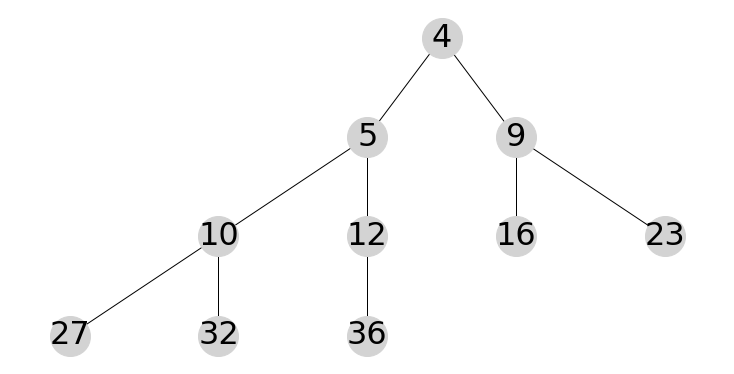

In [15]:
# Show the list
print(numList)
# Draws the sorted list from the heap sort function
drawtree(numList)

### Length of a List

Another place graph theory is used with heap sort is finding the maximum length of a list using the height of a binary tree.
- If we look at the tree above it has a height of 3 so we can work out the length as follows:

In [16]:
# first level is 2**0 and with each level the number increases up to 3
2**0 + 2**1 + 2**2 + 2**3

15

This calculation give us 15 which is the maximum number of nodes possible with the height of this tree.

We can write this calculation as a python function so we can pass any height in and it will return the maximum list length

In [17]:
''' This function returns the same results as 
    the calculation "2**0 + 2**1 + 2**2 + 2**3..."
'''
def maxList(height):
    return 2**(height+1) -1

In [18]:
# Returns 15 which is the maximum number possible for a height of 3
maxList(3)

15

### Big O Graphs

Another thing graph theory can be used for is looking at the different time complexitys of heap sort with the length of a list and comparing them.

In [19]:
# Numerical and random functions.
import numpy as np

In [20]:
# Use a list of 10 
n = np.arange(0.1, 10.1, 0.1)

# First comparison is n^2
y1 = n**2

# Second is nlog(n)
y2 = n * np.log(n)

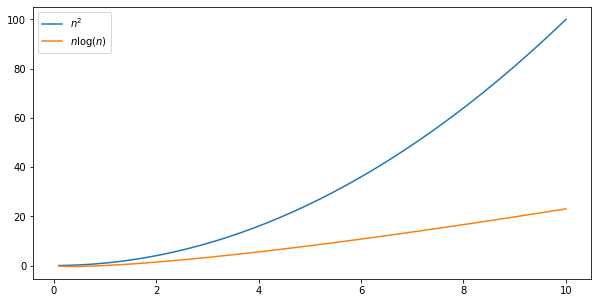

In [21]:
# plot both the lines
plt.plot(n, y1, label='$n^2$')
plt.plot(n, y2, label='$n \log(n)$')

plt.legend()

***

## End of Notebook